# Getting Started

This is a simple example of the basic capabilities of `aneris`.

First, model and history data are read in. The model is then harmonized. Finally, output is analyzed.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyam

import aneris
from aneris.tutorial import load_data

%matplotlib inline

<IPython.core.display.Javascript object>

The `driver` is used to execute the harmonization. It will handle the data formatting needed to execute the harmonizaiton operation and stores the harmonized results until they are needed.

Some logging output is provided. It can be suppressed with 

```
aneris.logger().setLevel('WARN')
```

In [2]:
aneris.logger().setLevel('WARN')

In [17]:
model, hist, driver = load_data()

{'suffix': 'suffix', 'add_5regions': False, 'prefix': 'prefix', 'config': {'harmonize_year': 2005, 'default_luc_method': 'reduce_ratio_2150_cov', 'cov_threshold': 20}}


The `sheetname` keyword is deprecated, use `sheet_name` instead


In [21]:
data = pyam.IamDataFrame(pd.concat([model[model.Region != 'World'], hist], sort=True))
data['variable'] = data['variable'].apply(lambda x: '|'.join(x.split('|')[2:-1]))

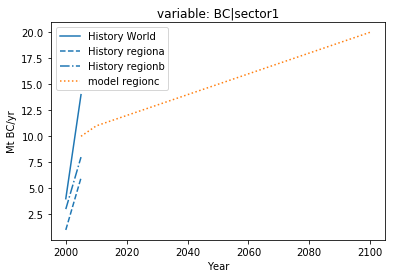

In [23]:
data.filter(variable='BC|sector1').line_plot(color='model', linestyle='region')

In [7]:
for scenario in driver.scenarios():
    driver.harmonize(scenario)
harmonized, metadata, diagnostics = driver.harmonized_results()

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [8]:
data = pyam.IamDataFrame(pd.concat([hist, model, harmonized], sort=True))

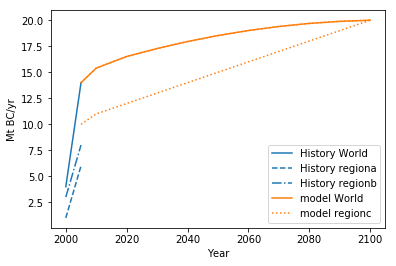

In [9]:
data.filter(variable='prefix|Emissions|BC|sector1|*').line_plot(color='model', linestyle='region')

In [13]:
data['variable'] = data['variable'].apply(lambda x: '|'.join(x.split('|')[2:-1]))

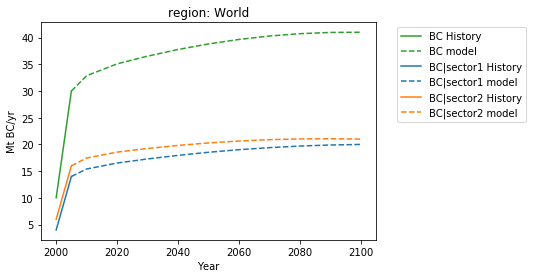

In [14]:
data.filter(region='World').line_plot(color='variable', linestyle='model', legend=dict(bbox_to_anchor=(1.05, 1)))

/home/gidden/.local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


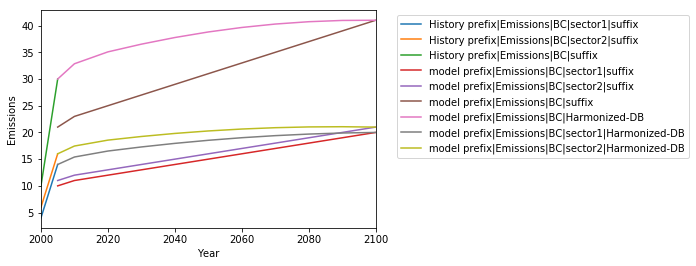

In [6]:
sns.tsplot(df, time='Year', condition='Label', value='Emissions', unit='Model')
plt.legend(bbox_to_anchor=(1.05, 1))